In [1]:
!pip install yfinance

     -------------------------------------- 73.5/73.5 kB 368.0 kB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 1.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 112.2/112.2 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 505.5/505.5 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 1.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-py3-none-any.whl size=138680 sha256=757d2f6878cfe9611608830c459aff840637e29f61e804245951f6d43f44efa2
  Stored in directory: c:\users\sanja\appdata\local\pip\cache\wheels\95\bd\4e\15d1893c245357e4d2353e77456c0be9561d1942ed

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf  # We will use this library to upload latest data from Yahoo API
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
# define the ticker you will use
nio = yf.Ticker('NIO')
#Display stock information, it will give you a summary description of the ticker
nio.info

{'address1': 'Building 20',
 'address2': 'No. 56 AnTuo Road Anting Town Jiading District',
 'city': 'Shanghai',
 'zip': '201804',
 'country': 'China',
 'website': 'https://www.nio.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'NIO Inc. designs, develops, manufactures, and sells smart electric vehicles in China. It offers five and six-seater electric SUVs, as well as smart electric sedans. The company also offers power solutions, including Power Home, a home charging solution; Power Swap, a battery swapping service; Power Charger and Destination Charger; Power Mobile, a mobile charging service through charging vans; Power Map, an application that provides access to a network of public chargers and their real-time information; and One Click for Power valet service. In addition, it provides re

In [4]:
history = nio.history(period="max")
df = pd.DataFrame(history)
df.head(10)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.60,66849000,0.0,0.0
2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.60,158346500,0.0,0.0
2018-09-14 00:00:00-04:00,12.66,13.80,9.22,9.90,172473600,0.0,0.0
2018-09-17 00:00:00-04:00,9.61,9.75,8.50,8.50,56323900,0.0,0.0
2018-09-18 00:00:00-04:00,8.73,9.10,7.67,7.68,41827600,0.0,0.0
2018-09-19 00:00:00-04:00,7.88,9.15,7.54,8.50,48306500,0.0,0.0
2018-09-20 00:00:00-04:00,9.07,9.47,8.42,8.78,40275000,0.0,0.0
2018-09-21 00:00:00-04:00,9.05,9.07,8.50,8.59,15118500,0.0,0.0
2018-09-24 00:00:00-04:00,8.32,8.39,7.85,7.87,16297900,0.0,0.0


In [5]:
# defining x and y 
x = df.index
y = df['Close']
y

Date
2018-09-12 00:00:00-04:00     6.60
2018-09-13 00:00:00-04:00    11.60
2018-09-14 00:00:00-04:00     9.90
2018-09-17 00:00:00-04:00     8.50
2018-09-18 00:00:00-04:00     7.68
                             ...  
2024-06-14 00:00:00-04:00     4.33
2024-06-17 00:00:00-04:00     4.43
2024-06-18 00:00:00-04:00     4.43
2024-06-20 00:00:00-04:00     4.33
2024-06-21 00:00:00-04:00     4.30
Name: Close, Length: 1453, dtype: float64

In [6]:
# Data Exploration
# i like to set up a plot function so i can reuse it at later stages of this analysis 
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

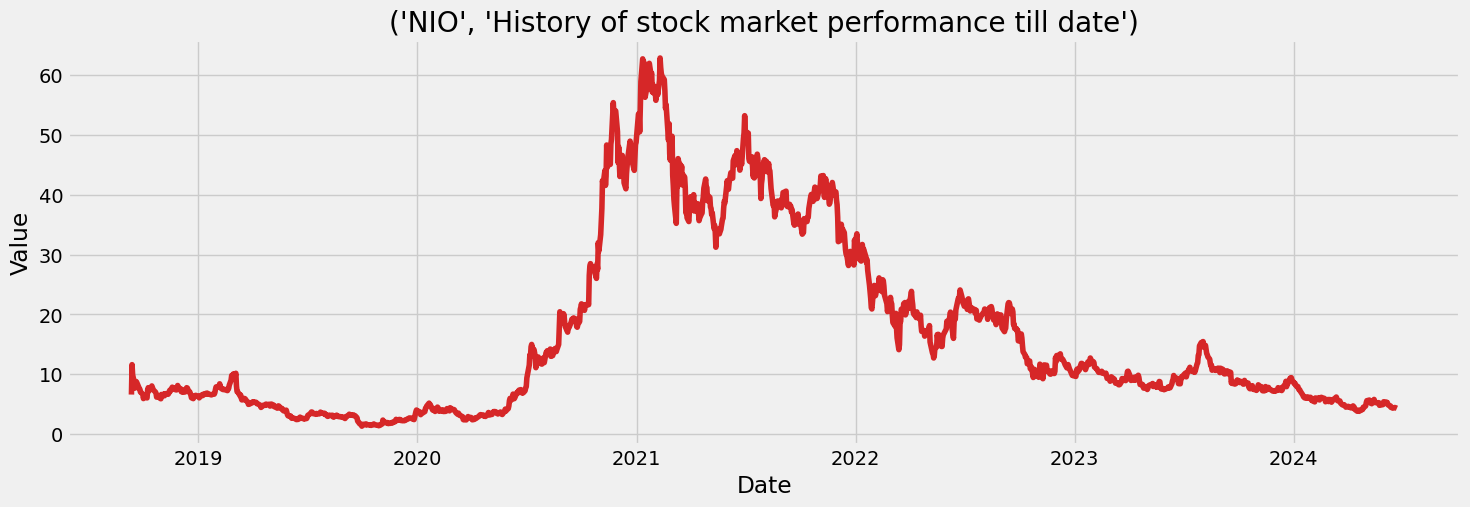

In [8]:
stock_name= "NIO"
title = (stock_name,"History of stock market performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [9]:
# Data Processing and scaling
df.reset_index(inplace=True) # to reset index and convert it to column

In [10]:
df.head(2)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.6,66849000,0.0,0.0
1,2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.6,158346500,0.0,0.0


In [11]:
df.columns= ['date','open','high','low','close','vol','divs','split']

In [12]:
df.drop(columns=['divs','split']).head(2) # We are dropping un necessary columns from the set

,date,open,high,low,close,vol
0,2018-09-12 00:00:00-04:00,6.00,6.93,5.35,6.6,66849000
1,2018-09-13 00:00:00-04:00,6.62,12.69,6.52,11.6,158346500


In [13]:
df['date'] = pd.to_datetime(df.date)

In [14]:
df.describe()

,open,high,low,close,vol,divs,split
count,1453.000000,1453.000000,1453.000000,1453.000000,1.453000e+03,1453.0,1453.0
mean,16.351356,16.859560,15.792168,16.332863,6.178436e+07,0.0,0.0
std,14.913074,15.338061,14.404421,14.887778,5.454758e+07,0.0,0.0
min,1.190000,1.450000,1.190000,1.320000,5.111000e+06,0.0,0.0
25%,5.530000,5.630000,5.270000,5.400000,3.285410e+07,0.0,0.0
50%,9.630000,10.050000,9.300000,9.690000,4.889430e+07,0.0,0.0
75%,21.730000,22.280001,20.940001,21.770000,7.307830e+07,0.0,0.0
max,64.949997,66.989998,62.189999,62.840000,5.771851e+08,0.0,0.0


In [15]:
print(len(df))

1453


In [16]:
x = df[['open', 'high','low', 'vol']]
y = df['close']

In [17]:
# Linear regression Model for stock prediction 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [18]:
# let's check if total observation makes sense
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(1235, 4)
(218, 4)
(1235,)
(218,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)


regression coefficient [-6.56285204e-01  9.43009048e-01  7.08560674e-01 -1.39139145e-10]
regression intercept -0.016343182322152927


In [20]:
# the coefficient of determination R² 
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.9965408646632864


In [21]:
predicted=regression.predict(test_x)
print(test_x.head())

       open   high    low       vol
1235  13.61  13.97  13.19  55643000
1236  12.77  13.01  12.55  54605400
1237  12.40  12.56  11.94  67398200
1238  12.26  12.34  11.55  71428600
1239  11.18  11.76  11.15  59478400


In [22]:
predicted.shape

(218,)

In [23]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
1235,13.25,13.563625
1236,12.90,12.756281
1237,12.52,12.140751
1238,11.83,11.748269
1239,11.40,11.628350
1240,11.50,11.987032
1241,10.67,10.827301
1242,10.95,10.935833
1243,10.79,10.713554
1244,10.84,10.862041


In [24]:
dfr.describe()

,Actual_Price,Predicted_Price
count,218.000000,218.000000
mean,6.958716,6.955187
std,2.095864,2.104648
min,3.800000,3.820416
25%,5.292500,5.298903
50%,6.425000,6.595793
75%,8.350000,8.330909
max,13.250000,13.563625


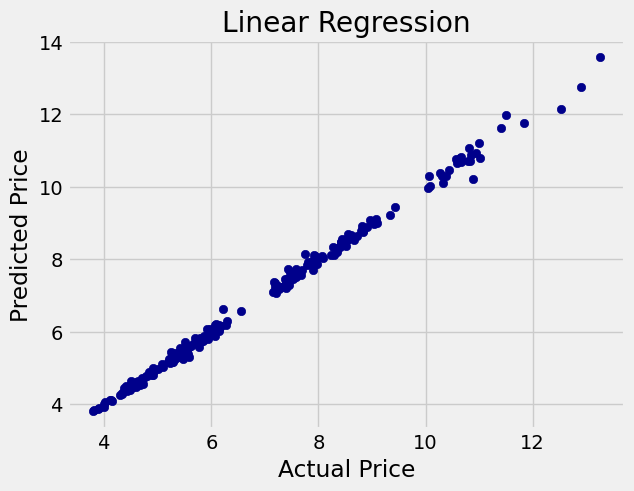

In [25]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.title("Linear Regression")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming train_x and train_y are your training data features and target values
# Specify the degree of the polynomial you want to fit
degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
train_x_poly = poly.fit_transform(train_x)

# Initialize and fit the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(train_x_poly, train_y)

# Print the coefficients and intercept of the polynomial regression model
print("Polynomial regression coefficients:", poly_regression.coef_)
print("Polynomial regression intercept:", poly_regression.intercept_)




Polynomial regression coefficients: [ 0.00000000e+00  3.37363316e-01  3.31335303e-01  3.12204785e-01
  1.41147905e-08 -7.28695271e-03 -3.54847579e-03 -1.47961110e-03
  1.24032755e-09  4.17727839e-04  4.63351143e-03 -1.71459431e-09
  7.92798066e-03  4.96412760e-10  1.11022302e-16]
Polynomial regression intercept: -1.3182301215451417


In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Specify the degree of the polynomial you want to fit
degree = 2

# Create polynomial features for training data
poly = PolynomialFeatures(degree=degree)
train_x_poly = poly.fit_transform(train_x)

# Fit the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(train_x_poly, train_y)

# Create polynomial features for test data
test_x_poly = poly.transform(test_x)

# Calculate and print the R^2 score for the polynomial regression model
poly_regression_confidence = poly_regression.score(test_x_poly, test_y)
print("Polynomial regression confidence (R^2):", poly_regression_confidence)




Polynomial regression confidence (R^2): 0.8122005169971225


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming train_x, train_y, test_x, and test_y are your training and test data features and target values

# Polynomial Regression
degree = 2  # Specify the degree of the polynomial
poly = PolynomialFeatures(degree=degree)

# Fit and transform the training data to polynomial features
train_x_poly = poly.fit_transform(train_x)

# Fit the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(train_x_poly, train_y)

# Transform the test data to polynomial features
test_x_poly = poly.transform(test_x)

# Polynomial regression prediction
predicted_poly = poly_regression.predict(test_x_poly)

# Print the first few rows of the test data
print(pd.DataFrame(test_x).head())

# Optionally, if you want to see the polynomial features of the test data
print(pd.DataFrame(test_x_poly).head())


       open   high    low       vol
1235  13.61  13.97  13.19  55643000
1236  12.77  13.01  12.55  54605400
1237  12.40  12.56  11.94  67398200
1238  12.26  12.34  11.55  71428600
1239  11.18  11.76  11.15  59478400
    0      1      2      3           4           5           6           7   \
0  1.0  13.61  13.97  13.19  55643000.0  185.232091  190.131699  179.515890   
1  1.0  12.77  13.01  12.55  54605400.0  163.072912  166.137709  160.263508   
2  1.0  12.40  12.56  11.94  67398200.0  153.759991  155.744000  148.055990   
3  1.0  12.26  12.34  11.55  71428600.0  150.307606  151.288405  141.603005   
4  1.0  11.18  11.76  11.15  59478400.0  124.992407  131.476806  124.656999   

             8           9           10            11          12  \
0  7.573012e+08  195.160907  184.264298  7.773327e+08  173.976089   
1  6.973110e+08  169.260106  163.275505  7.104163e+08  157.502505   
2  8.357377e+08  157.753611  149.966400  8.465214e+08  142.563590   
3  8.757147e+08  152.275604  142.

In [29]:
predicted.shape

(218,)

In [30]:
predicted_poly = poly_regression.predict(test_x_poly)

# Create DataFrame to compare actual and predicted prices
dfr_poly = pd.DataFrame({'Actual_Price': test_y, 'Predicted_Price': predicted_poly})
print(dfr_poly.head(10))

      Actual_Price  Predicted_Price
1235         13.25        13.144499
1236         12.90        12.368488
1237         12.52        12.193481
1238         11.83        12.011526
1239         11.40        11.107218
1240         11.50        11.971346
1241         10.67        10.864426
1242         10.95        10.395075
1243         10.79        10.279086
1244         10.84         9.753159


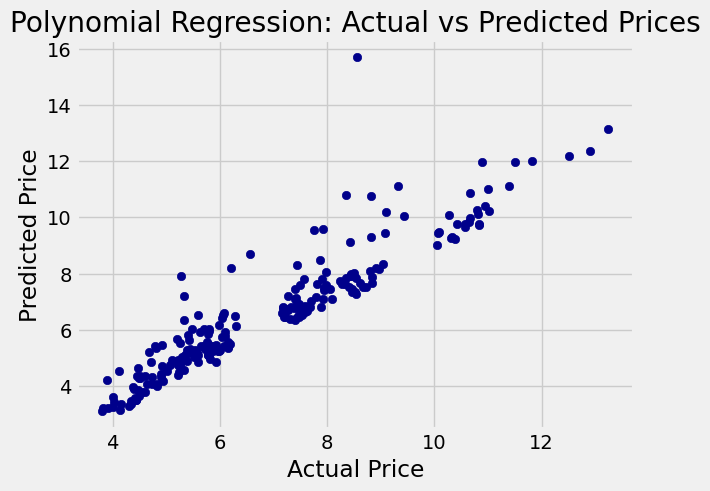

In [31]:
# Plotting the results
plt.scatter(dfr_poly.Actual_Price, dfr_poly.Predicted_Price, color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression: Actual vs Predicted Prices")
plt.show()

Logistic Regression Accuracy: 0.5045871559633027


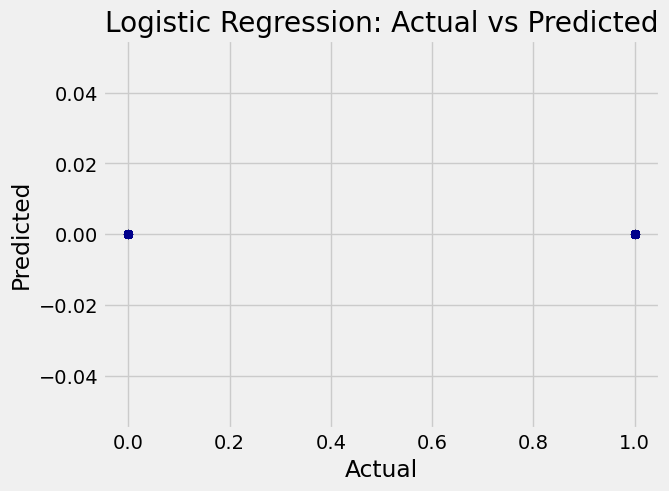

Confusion Matrix:
[[110   0]
 [108   0]]


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Example of binarizing a continuous target variable for binary classification
# Assuming train_x, train_y, test_x, and test_y are your original data

# Binarize the target variable
train_y_binary = (train_y > train_y.mean()).astype(int)
test_y_binary = (test_y > test_y.mean()).astype(int)

# Initialize logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(train_x, train_y_binary)

# Predict on the test data
predicted_logreg = logreg.predict(test_x)

# Calculate accuracy score
accuracy = accuracy_score(test_y_binary, predicted_logreg)
print("Logistic Regression Accuracy:", accuracy)

# Create DataFrame to compare actual and predicted values
dfr_logreg = pd.DataFrame({'Actual': test_y_binary, 'Predicted': predicted_logreg})

# Plotting the results
plt.scatter(dfr_logreg.Actual, dfr_logreg.Predicted, color='Darkblue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Logistic Regression: Actual vs Predicted")
plt.show()

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_y_binary, predicted_logreg))
